In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/Usuario/Desktop/ANA/UNIVERSIDAD/SEGUNDO/IRONHACK/Trabajo final/regression_datacsv.csv', delimiter = ';')



In [2]:
#1) Seleccione todos los datos de la tabla para verificar que se han importado correctamente
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,09/12/2014,3,"2,25",2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,25/02/2015,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,09/12/2014,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,18/02/2015,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000


In [3]:
#2) Elimina la columna date del dataframe, ya que no la usaremos en el análisis. Seleccione todos los datos de la tabla para comprobar que el comando funcionó

df = df.drop(columns = 'date', axis = 1)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,3,"2,25",2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000


In [4]:
#3) ¿Cuántas filas de datos tienes?

print(df.info())
#Vemos por la tabla de info que cada columna tiene 21597 datos, es decir, que hay 21597 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  int64 
 1   bedrooms       21597 non-null  int64 
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  int64 
 7   view           21597 non-null  int64 
 8   condition      21597 non-null  int64 
 9   grade          21597 non-null  int64 
 10  sqft_above     21597 non-null  int64 
 11  sqft_basement  21597 non-null  int64 
 12  yr_built       21597 non-null  int64 
 13  yr_renovated   21597 non-null  int64 
 14  zipcode        21597 non-null  int64 
 15  lat            21597 non-null  object
 16  long           21597 non-null  object
 17  sqft_living15  21597 non-null  int64 
 18  sqft_lot15     21597 non-n

In [5]:
#4) Encuentre los valores únicos de las siguientes columnas: dormitorios, baños, pisos, condicion, grado
#Usamos la función unique, que devuelve una lista con los valores de la tabla sin repetirlos

print('Valores dormitorios: ', df['bedrooms'].unique())
print('Valores baños: ', df['bathrooms'].unique())
print('Valores pisos: ', df['floors'].unique())
print('Valores condición: ', df['condition'].unique())
print('valores grado: ', df['grade'].unique())

Valores dormitorios:  [ 3  2  4  5  1  6  7  8  9 11 10 33]
Valores baños:  ['1' '2,25' '3' '2' '4,5' '1,5' '2,5' '1,75' '2,75' '3,25' '4' '3,5'
 '0,75' '4,75' '5' '4,25' '3,75' '1,25' '5,25' '6' '0,5' '5,5' '6,75'
 '5,75' '8' '7,5' '7,75' '6,25' '6,5']
Valores pisos:  ['1' '2' '1,5' '3' '2,5' '3,5']
Valores condición:  [3 5 4 1 2]
valores grado:  [ 7  6  8 11  9  5 10 12  4  3 13]


In [6]:
#5) Organice los datos en orden decreciente de precio, devuelva los ids de las 10 casas más caras
#Vamos a usar la funcion sort_values, que ordena según el primer parámetro que le pases. Normalmente de menor a mayor, pero al poner ascending false, lo hará de mayor a menor

df_precio = df.sort_values('price', ascending = False)
#Para printear los primeros 10 más caros hacemos un bucle
for i in range(0, 10):
    print(df['id'][i])

7129300520
6414100192
5631500400
2487200875
1954400510
7237550310
1321400060
2008000270
2414600126
3793500160


In [7]:
#6) ¿Cuál es el precio promedio de todas las propiedades?
#Usamos la funcion mean en la columna price
precio_medio = df['price'].mean()
precio_medio

540296.5735055795

    bedrooms         price
0          1  3.182395e+05
1          2  4.013877e+05
2          3  4.662766e+05
3          4  6.355647e+05
4          5  7.868741e+05
5          6  8.258535e+05
6          7  9.514478e+05
7          8  1.105077e+06
8          9  8.939998e+05
9         10  8.200000e+05
10        11  5.200000e+05
11        33  6.400000e+05


    bedrooms  sqft_living
0          1   888.153061
1          2  1239.752899
2          3  1805.837235
3          4  2554.649666
4          5  3047.545284
5          6  3284.341912
6          7  3974.210526
7          8  3800.000000
8          9  3775.000000
9         10  3706.666667
10        11  3000.000000
11        33  1620.000000


   waterfront         price
0           0  5.317623e+05
1           1  1.662524e+06
       Condicion  Grado
0              3      7
1              3      7
2              3      6
3              5      7
4              3      8
...          ...    ...
21592          3      8
21593          3      8
21594  

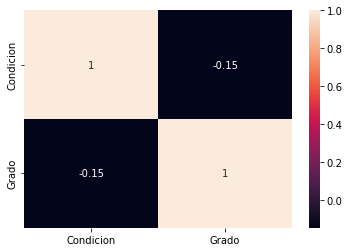

In [8]:
#7) Usa groupby para comprobar las propiedades de algunas de las variables categóricas de nuestros datos. ¿Hay alguna correlacion entre las columnas condicion y grado?

dorm = df.groupby(['bedrooms'])['price'].mean().reset_index()
print(dorm)
#Esta tabla nos indica, en la columna bedrooms todas las opciones que hay en el dataset de numero de dormitorios
#En la columna price, nos da la media del precio de las casas con el numero de dormitorios de la columna bedrooms
print('\n')
livin = df.groupby(['bedrooms'])['sqft_living'].mean().reset_index()
print(livin)
print('\n')
water = df.groupby(['waterfront'])['price'].mean().reset_index()
print(water)
#Hacemos lo mismo con las otras dos opciones

#Hacemos la matriz de correlacion y vemos las dos columnas:
jiji = pd.DataFrame({'Condicion': df['condition'], 'Grado': df['grade']})
mat_corr = jiji.corr()
print(jiji)
sns.heatmap(mat_corr, annot = True)
#En la matriz de correlacion sale un -0.15. Como no es cercano al 1 o al -1, no tienen relacion. 

#Para ver el numero de casas que tienen una condicion, las agrupamos con groupby, y, en vez de hacer la media, las contamos
num_casas = df.groupby(['condition'])['id'].count().reset_index()
print(num_casas)
#La condidicon 1 está muy pocas veces en comparacion con las demás, por lo que la podemos obviar.

In [9]:
#8) num habitaciones: 3 o 4, baños más de 3, 1 planta, no mar, condicion al menos 3, calificacion al menos 5, precio inferior a 300000
#En esta celda usamos esta funcion para redondear los valores de baño a numeros enteros para poder compararlos
def redondear(columna):
    for i in range(len(df)):
        if ',' in df[columna][i]:
            df[columna][i] = float(df[columna][i].replace(',', '.'))
            df[columna][i] = round(df[columna][i])
    return df

redondear('bathrooms')



,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,"47,6993","-122,346",1530,1509,360000
21593,6600060120,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,"47,5107","-122,362",1830,7200,400000
21594,1523300141,2,1,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,"47,5944","-122,299",1020,2007,402101
21595,291310100,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,"47,5345","-122,069",1410,1287,400000


In [10]:
#En esta celda vamos imponiendo las condiciones que pide el cliente para su casa y devolvemos una lista con todas las que cumplen

lista = []
for i in range(len(df['bedrooms'])):
    if df['bedrooms'][i] == 3 or df['bedrooms'][i] == 4:
        if int(df['bathrooms'][i]) >= 3:
            if df['waterfront'][i] == 0:
                if df['condition'][i] >= 3:
                    if df['grade'][i] >= 5:
                        if df['price'][i] < 300000:
                            lista.append(df['id'][i])
print(lista)
        

[1545804860, 7806300030, 2571910160, 7888400560, 993001629, 2329800240, 8732040810, 3512100110, 104550690, 104530490, 1773100121, 2734100734, 3395041194, 7137960110, 7165700110, 7140200280, 6918100170, 7575610170, 9264910280, 4345000170, 4345000050, 8001210170, 492000532, 8661000089, 4222100280, 9141100005, 2459000020, 4303200130, 1310970380, 2214800110, 6386700300, 7227800025, 1442800150, 1018000110, 4123800320, 3568200060, 8856004327, 7137950350, 3995700435, 1562100340, 2734100738, 2734100732, 4136880140, 1352300520, 393000311, 8081650400, 7349650120, 2025700730, 3832710450, 2114700040, 7140200450, 2500600297, 3920900220, 8651442520, 2734100736, 5029460180, 7225000155, 7349650330, 2944500470, 3832700250, 5412100920, 104560280, 3438503214, 8699100321, 3356403304, 8018600655, 3422059249, 7140200250, 3365900462, 3275300050, 8731990440, 5300200050, 7338402850, 6885900415, 7575620120, 1521049156, 4472000040, 1311800040, 8078550610, 9211500230, 4137020820, 7893802670, 2309710070, 866915070

In [11]:
#9) Lista de propiedades cuyos precios es dos veces más alta que la media
media_precios = df['price'].mean()
print(round(media_precios))
lista1 = []
for i in range(len(df['price'])):
    if df['price'][i] == 2* round(media_precios):
        lista1.append(df['id'][i])
        
print(lista1)
#No hay ninguna casa cuyo precio sea el doble de la media

540297
[]


In [12]:
#10) Diferencia de los precios medios de las casas con tres y cuatro dormitorios

#usamos la tabra dorm creada anteriormente para buscar en ella el precio medio de las casas con 4 y 3 habitaciones 
print(dorm.iloc[2])
print(dorm.iloc[3])

diff = dorm['price'].iloc[3] - dorm['price'].iloc[2]
print('PRECIO')
print(diff)

bedrooms         3.0000
price       466276.5909
Name: 2, dtype: float64
bedrooms         4.000000
price       635564.677129
Name: 3, dtype: float64
PRECIO
169288.0862289045


In [13]:
#11) ¿Cuáles son los códigos postales distintos?

#Usamos la funcion uniques
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [16]:
#12) ¿Cuáles son las propiedades que han sido renovadas?
renovadas = []
for i in range(len(df['yr_renovated'])):
    if df['yr_renovated'][i] != 0:
        renovadas.append(df['id'][i])
        
print(renovadas)

[6414100192, 9547205180, 1483300570, 2450000295, 3626039325, 4389200955, 8029200135, 6300000550, 46100204, 8096000060, 7228500560, 7960900060, 4235400186, 7424700045, 7520000520, 7520000520, 3179100060, 325059171, 7132300695, 1604601375, 936000060, 2268400350, 4055700030, 2172000075, 8820902200, 4432600075, 1180003090, 5486800070, 7942601895, 582000135, 8820903380, 8820903380, 4385700765, 1623300160, 5066400483, 9429500045, 2322069114, 1962200435, 1109000390, 9455200445, 5489200435, 2024059094, 6114600030, 1788700160, 7533800295, 3586500700, 3971700560, 1630700135, 1624079051, 7636800041, 4109600055, 9828700200, 7841300505, 3731800055, 8032700140, 1453600202, 5100401414, 8151601090, 7663700030, 7431500341, 8651430560, 5452800310, 6202600070, 5363200200, 1245001820, 1529300435, 1250203335, 5315100737, 2130702205, 2011400791, 65000260, 5649600435, 7625704005, 8080400045, 8651402920, 913000340, 9424400200, 254000445, 625059051, 7211400990, 225069017, 3013300055, 9151600695, 3885803625, 42

In [18]:
#13) Proporcione los detalles de la propiedad que es la 11ª propiedad más cara en su Dataframe

df_precio.iloc[10]

id               6065300370
bedrooms                  5
bathrooms                 6
sqft_living            7440
sqft_lot              21540
floors                    2
waterfront                0
view                      0
condition                 3
grade                    12
sqft_above             5550
sqft_basement          1890
yr_built               2003
yr_renovated              0
zipcode               98006
lat                 47,5692
long               -122,189
sqft_living15          4740
sqft_lot15            19329
price               4210000
Name: 12358, dtype: object